<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion1/blob/main/Monte_Carlo_APCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Importamos librerias
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

# Integración MC

Carmen Gabriela Angulo Payán

Para ilustrar el método de integración MC calculamos:

$\int_{0}^{1}\sqrt{arctan(x)}dx ≈ 0.629823$

Usando Wolfram obtenemos el resultado de dicha integral, la cual analíticamente no se puede, por lo que recurrimos a otros métodos.

**MC de la Media Muestral**

Consiste en tomar muchas muestras aleatorias y calcular la media de estas, esta media será una buena aproximación del valor esperado de la función que estamos estudiando.

**MC de Aceptación y Rechazo**



In [59]:
# Función a calcular
def f(x):
    return np.sqrt(np.arctan(x))

In [60]:
# Funcion que recrea el método de MC de la media muestral
# n Tamaño de las muestras
# a y b Limites
def MC_mm(n,a,b):
  C = []
  for _ in range(n):
    x = rnd.random()    # Num aleatorio
    X_i = a + x*(b-a)
    g = f(X_i)          # Evalua X_i en la función
    C.append(g)
  return C

In [61]:
Ejercicio = MC_mm(100000,0,1)
print('La integral es igual a:',np.mean(Ejercicio))

La integral es igual a: 0.6302537338079759


In [62]:
# Realizamos experimentos
medias_muestrales = []  # Guardara todas las n medias muestrales
for _ in range(1000):
  Ejercicio = MC_mm(50,0,1)
  theta1 = np.mean(Ejercicio)
  medias_muestrales.append(theta1)

estimacion_promedio = np.mean(medias_muestrales)   # Promedio de todas las muestras

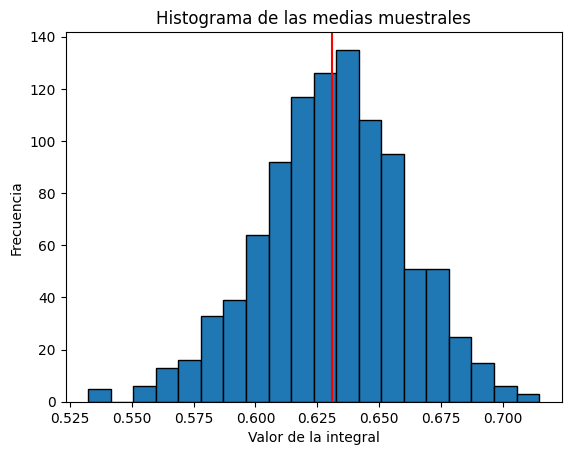

In [63]:
# Histograma
plt.hist(medias_muestrales, bins=20, edgecolor='black')
plt.title('Histograma de las medias muestrales')
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.axvline(estimacion_promedio, color='red')  #Valor de la integral

In [99]:
# Función que reacrea el MC de Aceptacion y Rechazo
# c constante
def MC_ar(n,a,b,c):
  L = []
  aceptados = []
  rechazados = []
  for _ in range(n):
    x_1 = rnd.random()    # Primer num aleatorio
    x_2 = rnd.random()    # Segundo num aleatorio
    X_i = a + x_1*(b-a)
    g = f(X_i)            # Evaluamos el X_1 obtenido
    if g > c*x_2:
      aceptados.append(g)
    else:
      rechazados.append(g)
  return aceptados,rechazados


In [100]:
aceptados,rechazados = MC_ar(10000,0,1,1)

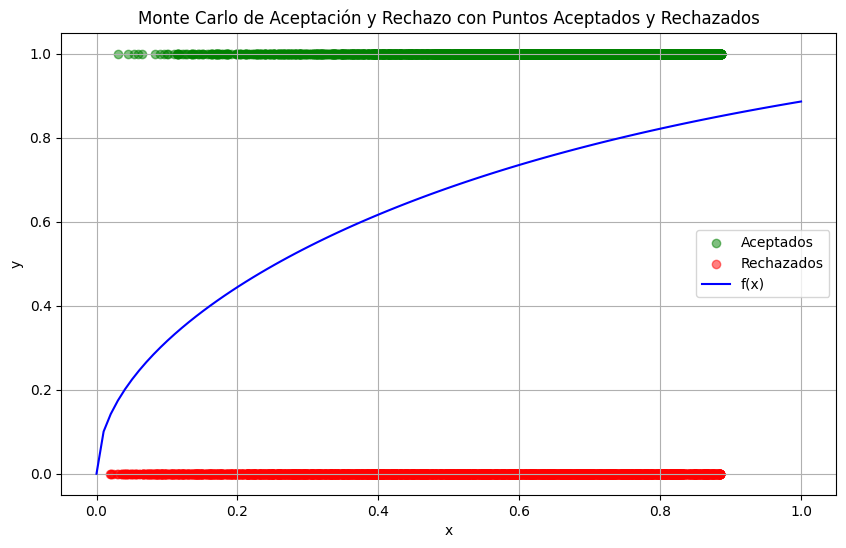

In [98]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar puntos aceptados y rechazados
plt.scatter(aceptados, np.ones_like(aceptados), color='green', label='Aceptados', alpha=0.5)
plt.scatter(rechazados, np.zeros_like(rechazados), color='red', label='Rechazados', alpha=0.5)

# Graficar función objetivo f(x)
x = np.linspace(a, b, 100)
plt.plot(x, f(x), label='f(x)', color='blue')

plt.title('Monte Carlo de Aceptación y Rechazo con Puntos Aceptados y Rechazados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()